# Cross Validation Lab

In this notebook, I am going to use the mtcars dataset as a worked example. You are to read this, try running the cells and understand what is going on in them. Get the logic behind the things I've tried

1) Looking at train_test_split and comparing training scores to test scores.
2) Getting cross validation scores to make a selection on which features to use.
3) Trying Polynomial Regression on a variable to see if it can improve things.

After this, I want you to repeat the procedure with the Diabetes dataset

First of all, let's look at the mtcars (1974 Motor Trend Cars) dataset and see what we can do with that.
<br><img src="images/mtcars.png" width="500"/><br>
Let's try more than one feature and see if this improves the model. We should be using separate sets for training and evaluating so let's try that now and see what happens

In [1663]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1664]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"}) # fix blank column name on first column (Pandas automatically labels that column as "Unnamed: 0" so replacing "Unnamed: 0" to "name")
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


y is the response variable so let's slice that off

In [1665]:
y = dfcars['mpg'] # this is the feature we want to predict

We have multiple possible X's let's put them aside too, we don't want the first two columns

In [1666]:
allX = dfcars.iloc[:, 2:]

In [1667]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We first of all need to separate the data into a training set and a test set. We can use train_test_split for this
#### Splitting the dataset into training and test sets:

- `allX`: feature data (independent variables).
- `y`: target data (dependent variable to be predicted).

The function `train_test_split` splits the data into training and test subsets:
- `allX_train`: part of `allX`, used to train the model.
- `allX_test`: part of `allX`, used to test the model.
- `y_train`: part of `y`, used to train the model.
- `y_test`: part of `y`, used to test the model.

The `test_size=0.2` argument specifies that 20% of the data will be used for testing and the remaining 80% for training, and `random_state=42` ensures the split is reproducible so the split selection will be the "same kind of random". Without it, the split would change with each run.

In [1668]:
from sklearn.model_selection import train_test_split #import splitter from sklearn

In [1669]:
#splitting initial dataframe to training and test data with train_test_split
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

<br>I did random_state=42 so the answer is the same everytime I run this workbook.

Ok now we have two different datasets, train and test that we can use where appropriate. First of all, we just want to try different features

### Linear Regression Model

I think 'wt' (weight) would be a good feature to select so I'll go with that

Separating out just that column into what we are going to fit

In [1670]:
# single out one good looking column we want for the linear regression model
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

Now build the model

In [1671]:
from sklearn.linear_model import LinearRegression

In [1672]:
#model1 will use "wt"
model1 = LinearRegression() #initiate Linear Regression model
model1.fit(X_train, y_train) # fit model to traing data X_train is input (independent varables), y_train is output or target (dependent values)

LinearRegression()

*Let's look at the scores of both the training set and test set*
<br>
The `model1.score(X_train, y_train)` method returns the coefficient of determination, or **R² score**, for the training data.

- **R²** indicates how well the model fits the data.
- It ranges from **0 to 1**, where:
  - **1** means the model perfectly predicts the target values.
  - **0** means the model does not explain any variability in the target values.

Thisindicates how well the linear regression model fits the training data.


In [1673]:
model1.score(X_train, y_train) # check model fit for training data

0.7701379909791616

In [1674]:
model1.score(X_test, y_test)  # check model fit for test(control) data

0.6879761857596277

0.77 is a decent fit but when running with the test data the score is down to 0.68 This may indicate overfitting (underfitting would show low numbers for both).  
<br> let's try a different feature/observation from the dataset.

+ build a new model (model2) with "hp" as independent variable


In [1675]:
X_train = allX_train[["hp"]]
X_test = allX_test[["hp"]]

In [1676]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [1677]:
model2.score(X_train, y_train)

0.6504157759912871

In [1678]:
model2.score(X_test, y_test)

0.3996010170101506

This is even worse. Ok hp is even worse performing than wt. Not a good one to use

try another feature 'drat' for model3

In [1679]:
X_train = allX_train[["drat"]]
X_test = allX_test[["drat"]]

In [1680]:
model3 = LinearRegression()
model3.fit(X_train, y_train)

LinearRegression()

In [1681]:
model3.score(X_train, y_train)

0.45889832481878434

In [1682]:
model3.score(X_test, y_test)

0.4652147268834994

The best I tried was wt, the first one. Anyway let's try combining two variables

In [1683]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [1684]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [1685]:
model4 = LinearRegression()
model4.fit(X_train, y_train)

LinearRegression()

In [1686]:
model4.score(X_train, y_train)

0.8321502526033073

That is a better training score, but what about the test score which is really what's important

In [1687]:
model4.score(X_test, y_test)

0.7880448439485955

That's the best we've had so far, so model4 with 2 combined columns is the best one of that we tried

## Validation
Hold on, I've contradicted a little what I said in the "lecture". I'm using the test score to make decisions. I should not be doing this. I should use some form of validation. So here's an example of that

>**cross_val_score** automatically split the training data into several folds (default is 5), train the model, and calculate the score for each fold. This indicates how the model performs on each subset (fold) of the data.
<br> to get an overall picture we can summarise the output with

+ + mean_score = scores.mean()  # Average score
+ + std_dev = scores.std()       # Variability in scores

In [1688]:
from sklearn.model_selection import cross_val_score
#cross_val_score automatically split the training data into several folds, train the model, and calculate the score for each fold.

Let's try wt again

In [1689]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [1690]:
model5 = LinearRegression()
scores = cross_val_score(model5, X_train, y_train)
scores

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [1691]:
scores.mean()

0.571112815468978

Now let's try the two variables, wt and hp again

In [1692]:
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [1693]:
model6 = LinearRegression()
scores6 = cross_val_score(model6, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [1694]:
scores6.mean()

0.6332786406507418

So the two together has a higher cross validation score that just one. This means we should select the two variables over one 

What about 3? Let's try drat

In [1695]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [1696]:
model7 = LinearRegression()
scores7 = cross_val_score(model7, X_train, y_train)
scores7.mean()

0.6571279909053496

Slightly better than 2. It is not always the case that more features the better, just happened in the above example

Let's try three features again, but this time with carb instead of drat

In [1697]:
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [1698]:
model8 = LinearRegression()
scores8 = cross_val_score(model8, X_train, y_train)
scores8.mean()

0.6036599344425264

This score is worse than only using the two features wt and hp

Our best so far (according to the cross val scores) has been model7, the one with ["wt","hp","drat"]. So let's build that model fully and then evaluate that

In [1699]:
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.79004928438052

A score of .79 for the test set

## Polynomial Regression Example

I am going to use the 'wt' as a feature and see what happens with a polynomial regression model

Some notes about Polynomial and sklearn

### The `scikit-learn` interface

Scikit-learn is the main python machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in python by the incantation `import sklearn`.

The library has a very well defined interface. This makes the library a joy to use, and surely contributes to its popularity. As the [scikit-learn API paper](http://arxiv.org/pdf/1309.0238v1.pdf) [Buitinck, Lars, et al. "API design for machine learning software: experiences from the scikit-learn project." arXiv preprint arXiv:1309.0238 (2013).] says:

>All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces: **an estimator interface for building and ﬁtting models, a predictor interface for making predictions and a transformer interface for converting data**. The estimator interface is at the core of the library. It deﬁnes instantiation mechanisms of objects and exposes a `fit` method for learning a model from training data. All supervised and unsupervised learning algorithms (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. Machine learning tasks like feature extraction, feature selection or dimensionality reduction are also provided as estimators.

We'll use the "estimator" interface here, specifically the estimator `PolynomialFeatures`. The API paper again:

>Since it is common to modify or ﬁlter data before feeding it to a learning algorithm, some estimators in the library implement a transformer interface which deﬁnes a transform method. It takes as input some new data X and yields as output a transformed version of X. Preprocessing, feature selection, feature extraction and dimensionality reduction algorithms are all provided as transformers within the library.

To start with we have one **feature** `x` to predict `y`, what we will do is the transformation:

$$ x \rightarrow 1, x, x^2, x^3, ..., x^d $$

for some power $d$. Our job then is to **fit** for the coefficients of these features in the polynomial

$$ a_0 + a_1 x + a_2 x^2 + ... + a_d x^d. $$

In other words, we have transformed a function of one feature, into a (rather simple) **linear** function of many features. To do this we first construct the estimator as `PolynomialFeatures(d)`, and then transform these features into a d-dimensional space using the method `fit_transform`.

![fit_transform](images/sklearntrans.jpg)

Here is an example. The reason for using `[[1],[2],[3]]` as opposed to `[1,2,3]` is that scikit-learn expects data to be stored in a two-dimensional array or matrix with size `[n_samples, n_features]`.

To transform `[1,2,3]` into [[1],[2],[3]] we need to do a reshape.

![reshape](images/reshape.jpg)

In [1700]:
demo = np.array([1,2,3]).reshape(-1,1)
demo

array([[1],
       [2],
       [3]])

In [1701]:
from sklearn.preprocessing import PolynomialFeatures

In [1702]:
PolynomialFeatures(5).fit_transform(demo) # demo input is [1],[2],[3] 

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

This is $x^0 , x^1, x^2, x^3, x^4, x^5$

In [1703]:
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

### Improve model with PolynimonalFeatures. 
**PolynomialFeatures(2)**: This initializes a `PolynomialFeatures` object that will transform the input features into polynomial features of degree 2. This means it will include the original features and their squares. For example, if your original feature is \( $x$ \), the polynomial features generated will be \([$1, x, x^2$]\).<br>
By including polynomial features, the model can create additional "peaks" and "valleys" in the curve.
This helps in fitting the data more closely, especially when there are non-linear patterns.
+ Pros: Captures more complex patterns in the data.
+ Cons: Higher-degree polynomials can lead to overfitting, where the model learns the noise in the data instead of the underlying pattern.


In [1704]:
# convert input data to polinomial data 
X_train_poly = PolynomialFeatures(2).fit_transform(X_train) # (2) signifies degree 2 [1, x, x^2]
X_test_poly = PolynomialFeatures(2).fit_transform(X_test)

In [1705]:
# Initiate linear regression model with polynomial data
modelpoly2 = LinearRegression()  
# - Create an instance of the LinearRegression model
# - This model will be used to fit the polynomial features we created earlier
modelpoly2.fit(X_train_poly, y_train)  
# - Fit the model to the training data
# - X_train_poly contains the polynomial features (including original and squared terms)
# - y_train is the target variable (the values you want to predict)
# - This trains the linear regression model to learn the relationship between the polynomial features and the target variable


LinearRegression()

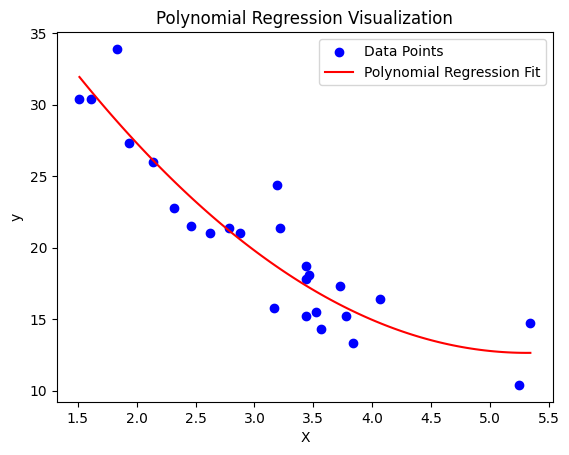

In [1706]:
# Visualise model fit
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# use the existing X values for the plot.
# We need to transform the polynomial features back to the original X space 
    # meaning converting the polynomial features back to their original feature values for visualization purposes
# Create a range of values for X to predict and plot
X_plot = np.linspace(X_train_poly[:, 1].min(), X_train_poly[:, 1].max(), 100).reshape(-1, 1)  # Create 100 points for the curve
X_plot_poly = PolynomialFeatures(degree=2).fit_transform(X_plot)  # Transform to polynomial features
# Predict values using the polynomial model
y_plot = modelpoly2.predict(X_plot_poly)
# Visualize the results
plt.scatter(X_train_poly[:, 1], y_train, color='blue', label='Data Points')  # Original data points
plt.plot(X_plot, y_plot, color='red', label='Polynomial Regression Fit')  # Polynomial regression curve
plt.title('Polynomial Regression Visualization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [1707]:
# check perfrormance 
print("train fit: ",modelpoly2.score(X_train_poly, y_train))
print("test fit: ",modelpoly2.score(X_test_poly, y_test))

train fit:  0.854847503022551
test fit:  0.6821839404663566


Let's now do a loop for more of them and record all the scores in an array

We will initialise the array as all zeros

In [1708]:
from sklearn.metrics import mean_squared_error

In [1709]:
max_p = 10  # Define the maximum polynomial degree to evaluate
degrees = range(max_p + 1)  # Create a range of degrees from 0 to max_p (inclusive)
train_scores = np.zeros(max_p + 1)  # Initialize an array to store training scores for each degree
test_scores = np.zeros(max_p + 1)  # Initialize an array to store test scores for each degree
error_train = np.zeros(max_p + 1)  # Initialize an array to store training error (MSE) for each degree
error_test = np.zeros(max_p + 1)  # Initialize an array to store test error (MSE) for each degree


In [1710]:
# Loop through each degree to fit polynomial regression models
for i in degrees:
    if i != 0:  # Skip degree 0 
        # Transform the training and test data into polynomial features of degree i
        X_train_poly = PolynomialFeatures(i).fit_transform(X_train)
        X_test_poly = PolynomialFeatures(i).fit_transform(X_test)
        # Create a Linear Regression model
        polymodel = LinearRegression()
        # Fit the model on the polynomial features of the training data
        polymodel.fit(X_train_poly, y_train)
        # Make predictions on the training data
        prediction_on_training = polymodel.predict(X_train_poly)
        # Make predictions on the test data
        prediction_on_test = polymodel.predict(X_test_poly)
        # Calculate and store the mean squared error for the training predictions
        error_train[i] = mean_squared_error(y_train, prediction_on_training)
        # Calculate and store the mean squared error for the test predictions
        error_test[i] = mean_squared_error(y_test, prediction_on_test)
        # Calculate and store the R² score for the training data (model performance on training data)
        train_scores[i] = polymodel.score(X_train_poly, y_train)
        # Calculate and store the R² score for the test data (model performance on test data)
        test_scores[i] = polymodel.score(X_test_poly, y_test)

In [1711]:
train_scores

array([0.        , 0.77013799, 0.8548475 , 0.85493705, 0.85535746,
       0.86830004, 0.87003984, 0.9023398 , 0.91029886, 0.91151736,
       0.91162721])

In [1712]:
test_scores

array([ 0.        ,  0.68797619,  0.68218394,  0.68190896,  0.66709096,
        0.51118378,  0.59548701,  0.18206234, -0.25372265,  0.31207486,
       -0.44975206])

Now let's look at plots and things. I am going to keep doing error_train[1:], error_test[1:] so the 0 value is not counted

This will give us the degree with the lowest error in the test set

In [1713]:
bestd = np.argmin(error_test[1:])+1

train:  [7.77369777 4.90890881 4.90588057 4.89166244 4.45395762 4.39511938
 3.30276784 3.03360069 2.99239219 2.98867742]
test:  [12.47598566 12.70758327 12.71857809 13.31106213 19.54486779 16.17408045
 32.70448599 50.1289488  27.5060551  57.96700476]


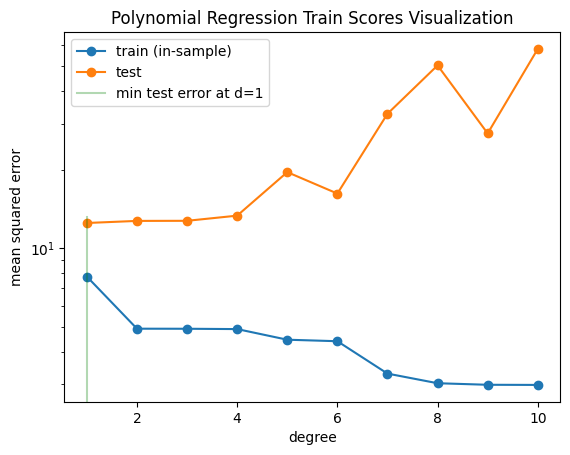

In [1714]:
plt.plot(degrees[1:], error_train[1:], marker='o', label='train (in-sample)')
plt.plot(degrees[1:], error_test[1:], marker='o', label='test')
plt.axvline(bestd, 0,0.5, color='g', label="min test error at d=%d"%bestd, alpha=0.3)
plt.title('Polynomial Regression Train Scores Visualization')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print("train: ",error_train[1:])
print("test: ",error_test[1:])

So the simple linear regression $y = w_0 + w_1x$ works best for wt

Notice how the training error keeps getting smaller as the degree increases, but this does not correspond to a better test error

This is expected if we looked at the scatter plot of wt vs mpg

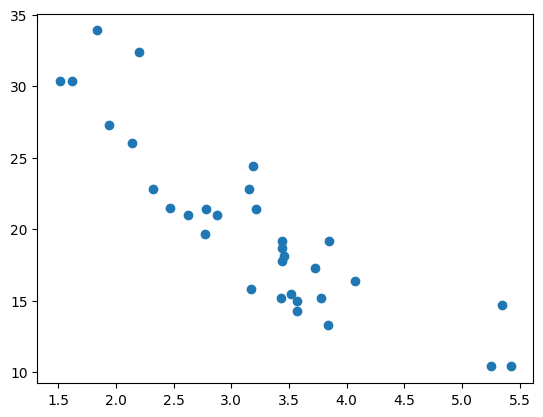

In [1715]:
plt.scatter(dfcars["wt"],dfcars["mpg"])

Relationship looks linear

## Some work for you to do

## Firstly - Validation


What we have done in picking a given degree $d$ as the best hypothesis is that we have used the test set as a training set. 
If we choose the best $d$ based on minimizing the test set error, we have then "fit for" hyperparameter $d$ on the test set. 

In this case, the test-set error will underestimate the true out of sample error. Furthermore, we have **contaminated the test set** by fitting for $d$ on it; it is no longer a true test set.

Thus, we introduce a new **validation set** on which the complexity parameter $d$ is fit, and leave out a test set which we can use to estimate the true out-of-sample performance of our learner. The place of this set in the scheme of things is shown below:

![m:caption](images/train-validate-test.png)

We have split the old training set into a **new smaller training set** and a **validation set**, holding the old test aside for FINAL testing AFTER we have "fit" for complexity $d$. Obviously we have decreased the size of the data available for training further, but this is a price we must pay for obtaining a good estimate of the out-of-sample error 

![m:caption](images/train-validate-test-cont.png)

The validation process is illustrated in these two figures. We first loop over the complexity parameter $d$, the degree of the polynomials we will try and fit. Then for each degree $d$, we obtain a best fit model $g^-_d$ where the "minus" superscript indicates that we fit our model on the new training set which is obtained by removing ("minusing") a validation chunk (often the same size as the test chunk) from the old training set. We then "test" this model on the validation chunk, obtaining the validation error for the best-fit polynomial coefficients and for degree $d$. We move on to the next degree $d$ and repeat the process, just like before. We compare all the validation set errors, just like we did with the test errors earlier, and pick the degree $d_*$ which minimizes this validation set error.

![caption](images/train-validate-test3.png)

Having picked the hyperparameter $d_*$, we retrain on the entire old training-set to find the parameters of the polynomial of order $d_*$.  We now compute the test error on the test set as an estimate of the test error.

Thus the **validation** set is the set on which the hyperparameter is fit. This method of splitting the data $\cal{D}$ is called the **train-validate-test** split.

### Fit on training and predict on validation


We carry out this process for one training/validation split below. Note the smaller size of the new training set. We hold the test set at the same size.

Firstly, let's split the training set up further into X_v_train, X_v_valid, y_v_train and y_v_valid using train_test_split again

In [1716]:
# your code here
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)

In [1717]:
X_v_train.shape

(18, 1)


>YOUR TURN HERE: Train on the smaller training set. Fit for d on the validation set.  Store the respective MSEs in `error_train` and `error_valid`. Then retrain on the entire training set using this d. Label the test set MSE with the variable `err`.

In [1718]:
#Note code below hasn't been tested but is here for psuedocode suggestion

error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
score_train=np.empty(len(degrees))
score_valid=np.empty(len(degrees))
#for each degree, we now fit on the smaller training set and predict on the validation set
#we accumulate the MSE on both sets in error_train and error_valid
#we then find the degree of polynomial that minimizes the MSE on the validation set.
#your code here
for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from X_v_train and X_v_valid
    X_c = PolynomialFeatures(d).fit_transform(X_v_train)
    X_c_val = PolynomialFeatures(d).fit_transform(X_v_valid)
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)    
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(est.predict(X_c), y_v_train)
    error_valid[d] = mean_squared_error(est.predict(X_c_val), y_v_valid)
    score_train[d] = est.score(X_c, y_v_train)
    score_valid[d] = est.score(X_c_val, y_v_valid)
    

Plot the training error and validation error against the degree of the polynomial, and show the test set error at the $d$ which minimizes the validation set error.

Fit on WHOLE training set now. You will need to remake polynomial features on the whole training set. Test on TestSet

Try with Cross Validation

# Try now with the Diabetes Dataset (more samples)

In [1719]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

## Do similar to what I've done with the diabetes dataset

See if you can find a better combination of columns rather than using all of them

Pick one variable and see if a Polynomial Regression model could improve that one variable